In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\ZOMATO-EQ-27-09-2020-to-27-09-2024.csv")
df.head()

Date  series    OPEN    HIGH     LOW   PREV. CLOSE     ltp   close   \
0  23-Jul-21      EQ  116.00  138.90  115.00         76.00  125.30  126.00   
1  26-Jul-21      EQ  126.35  143.75  125.30        126.00  138.05  140.65   
2  27-Jul-21      EQ  141.70  147.80  127.75        140.65  130.65  132.90   
3  28-Jul-21      EQ  131.00  135.00  123.55        132.90  133.00  131.20   
4  29-Jul-21      EQ  134.95  144.00  132.20        131.20  142.25  141.55   

    vwap   52W H   52W L        VOLUME               VALUE  No of trades   
0  124.12  138.90   115.0  69,48,95,290  86,25,27,47,421.30     24,28,917  
1  134.63  143.75   115.0  24,97,23,854  33,62,03,24,359.75     10,34,160  
2  141.09  147.80   115.0  24,03,41,900  33,90,96,84,267.35     10,75,475  
3  127.90  147.80   115.0  15,97,93,731  20,43,70,12,592.05      6,27,048  
4  137.73  147.80   115.0  11,79,73,089  16,24,87,96,568.35      4,89,222

In [3]:
data = df[['Date ', 'OPEN ', 'HIGH ', 'LOW ', 'close ', 'VOLUME ']]

In [4]:
data = data.rename(columns={'Date ':'Date','OPEN ':'Open','HIGH ':'High','LOW ':'Low','close ':'Close','VOLUME ':'Volume'})
data.head()

Date    Open    High     Low   Close        Volume
0  23-Jul-21  116.00  138.90  115.00  126.00  69,48,95,290
1  26-Jul-21  126.35  143.75  125.30  140.65  24,97,23,854
2  27-Jul-21  141.70  147.80  127.75  132.90  24,03,41,900
3  28-Jul-21  131.00  135.00  123.55  131.20  15,97,93,731
4  29-Jul-21  134.95  144.00  132.20  141.55  11,79,73,089

In [5]:
data = data.set_index(data['Date'])
data = data.drop(['Date'],axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 23-Jul-21 to 27-Sep-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    794 non-null    float64
 1   High    794 non-null    float64
 2   Low     794 non-null    float64
 3   Close   794 non-null    float64
 4   Volume  794 non-null    object 
dtypes: float64(4), object(1)
memory usage: 37.2+ KB


In [7]:
data['Volume'] = pd.to_numeric(data['Volume'].str.replace(',', ''), errors='coerce')

In [8]:
df1 = data

In [16]:
# Reset the index to ensure it is in datetime format
df1.reset_index(drop=False, inplace=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18312\2333775142.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


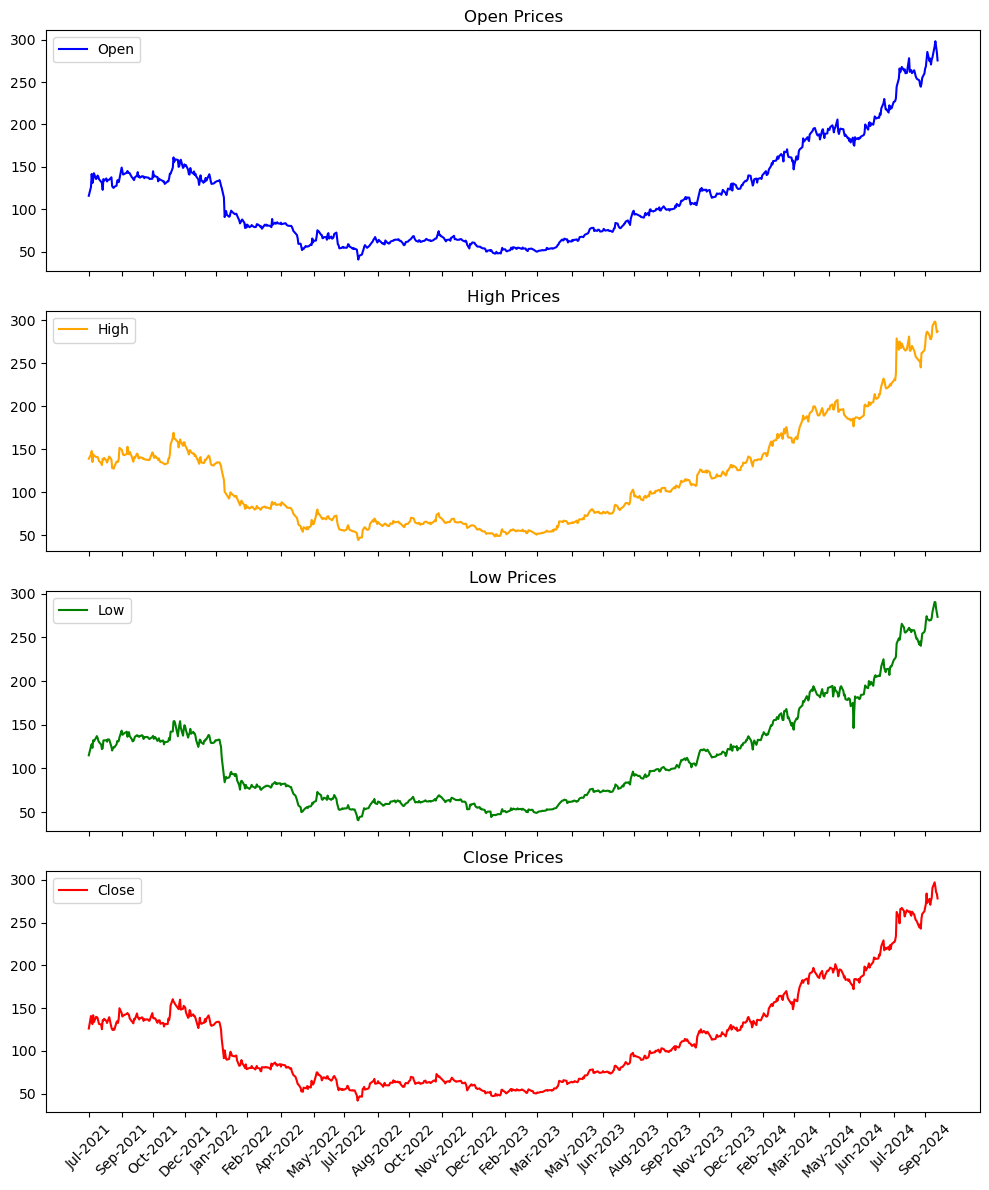

In [18]:
# Create a figure with subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot Open prices
axs[0].plot(df1.index, df1['Open'], label='Open', color='blue')
axs[0].set_title('Open Prices')
axs[0].legend()

# Plot High prices
axs[1].plot(df1.index, df1['High'], label='High', color='orange')
axs[1].set_title('High Prices')
axs[1].legend()

# Plot Low prices
axs[2].plot(df1.index, df1['Low'], label='Low', color='green')
axs[2].set_title('Low Prices')
axs[2].legend()

# Plot Close prices
axs[3].plot(df1.index, df1['Close'], label='Close', color='red')
axs[3].set_title('Close Prices')
axs[3].legend()

# Format x-ticks to show month-year
axs[3].set_xticks(df1.index[::30])  # Set ticks every 30 days
axs[3].set_xticklabels([date.strftime('%b-%Y') for date in df1.index[::30]], rotation=45)

plt.tight_layout()
plt.show()


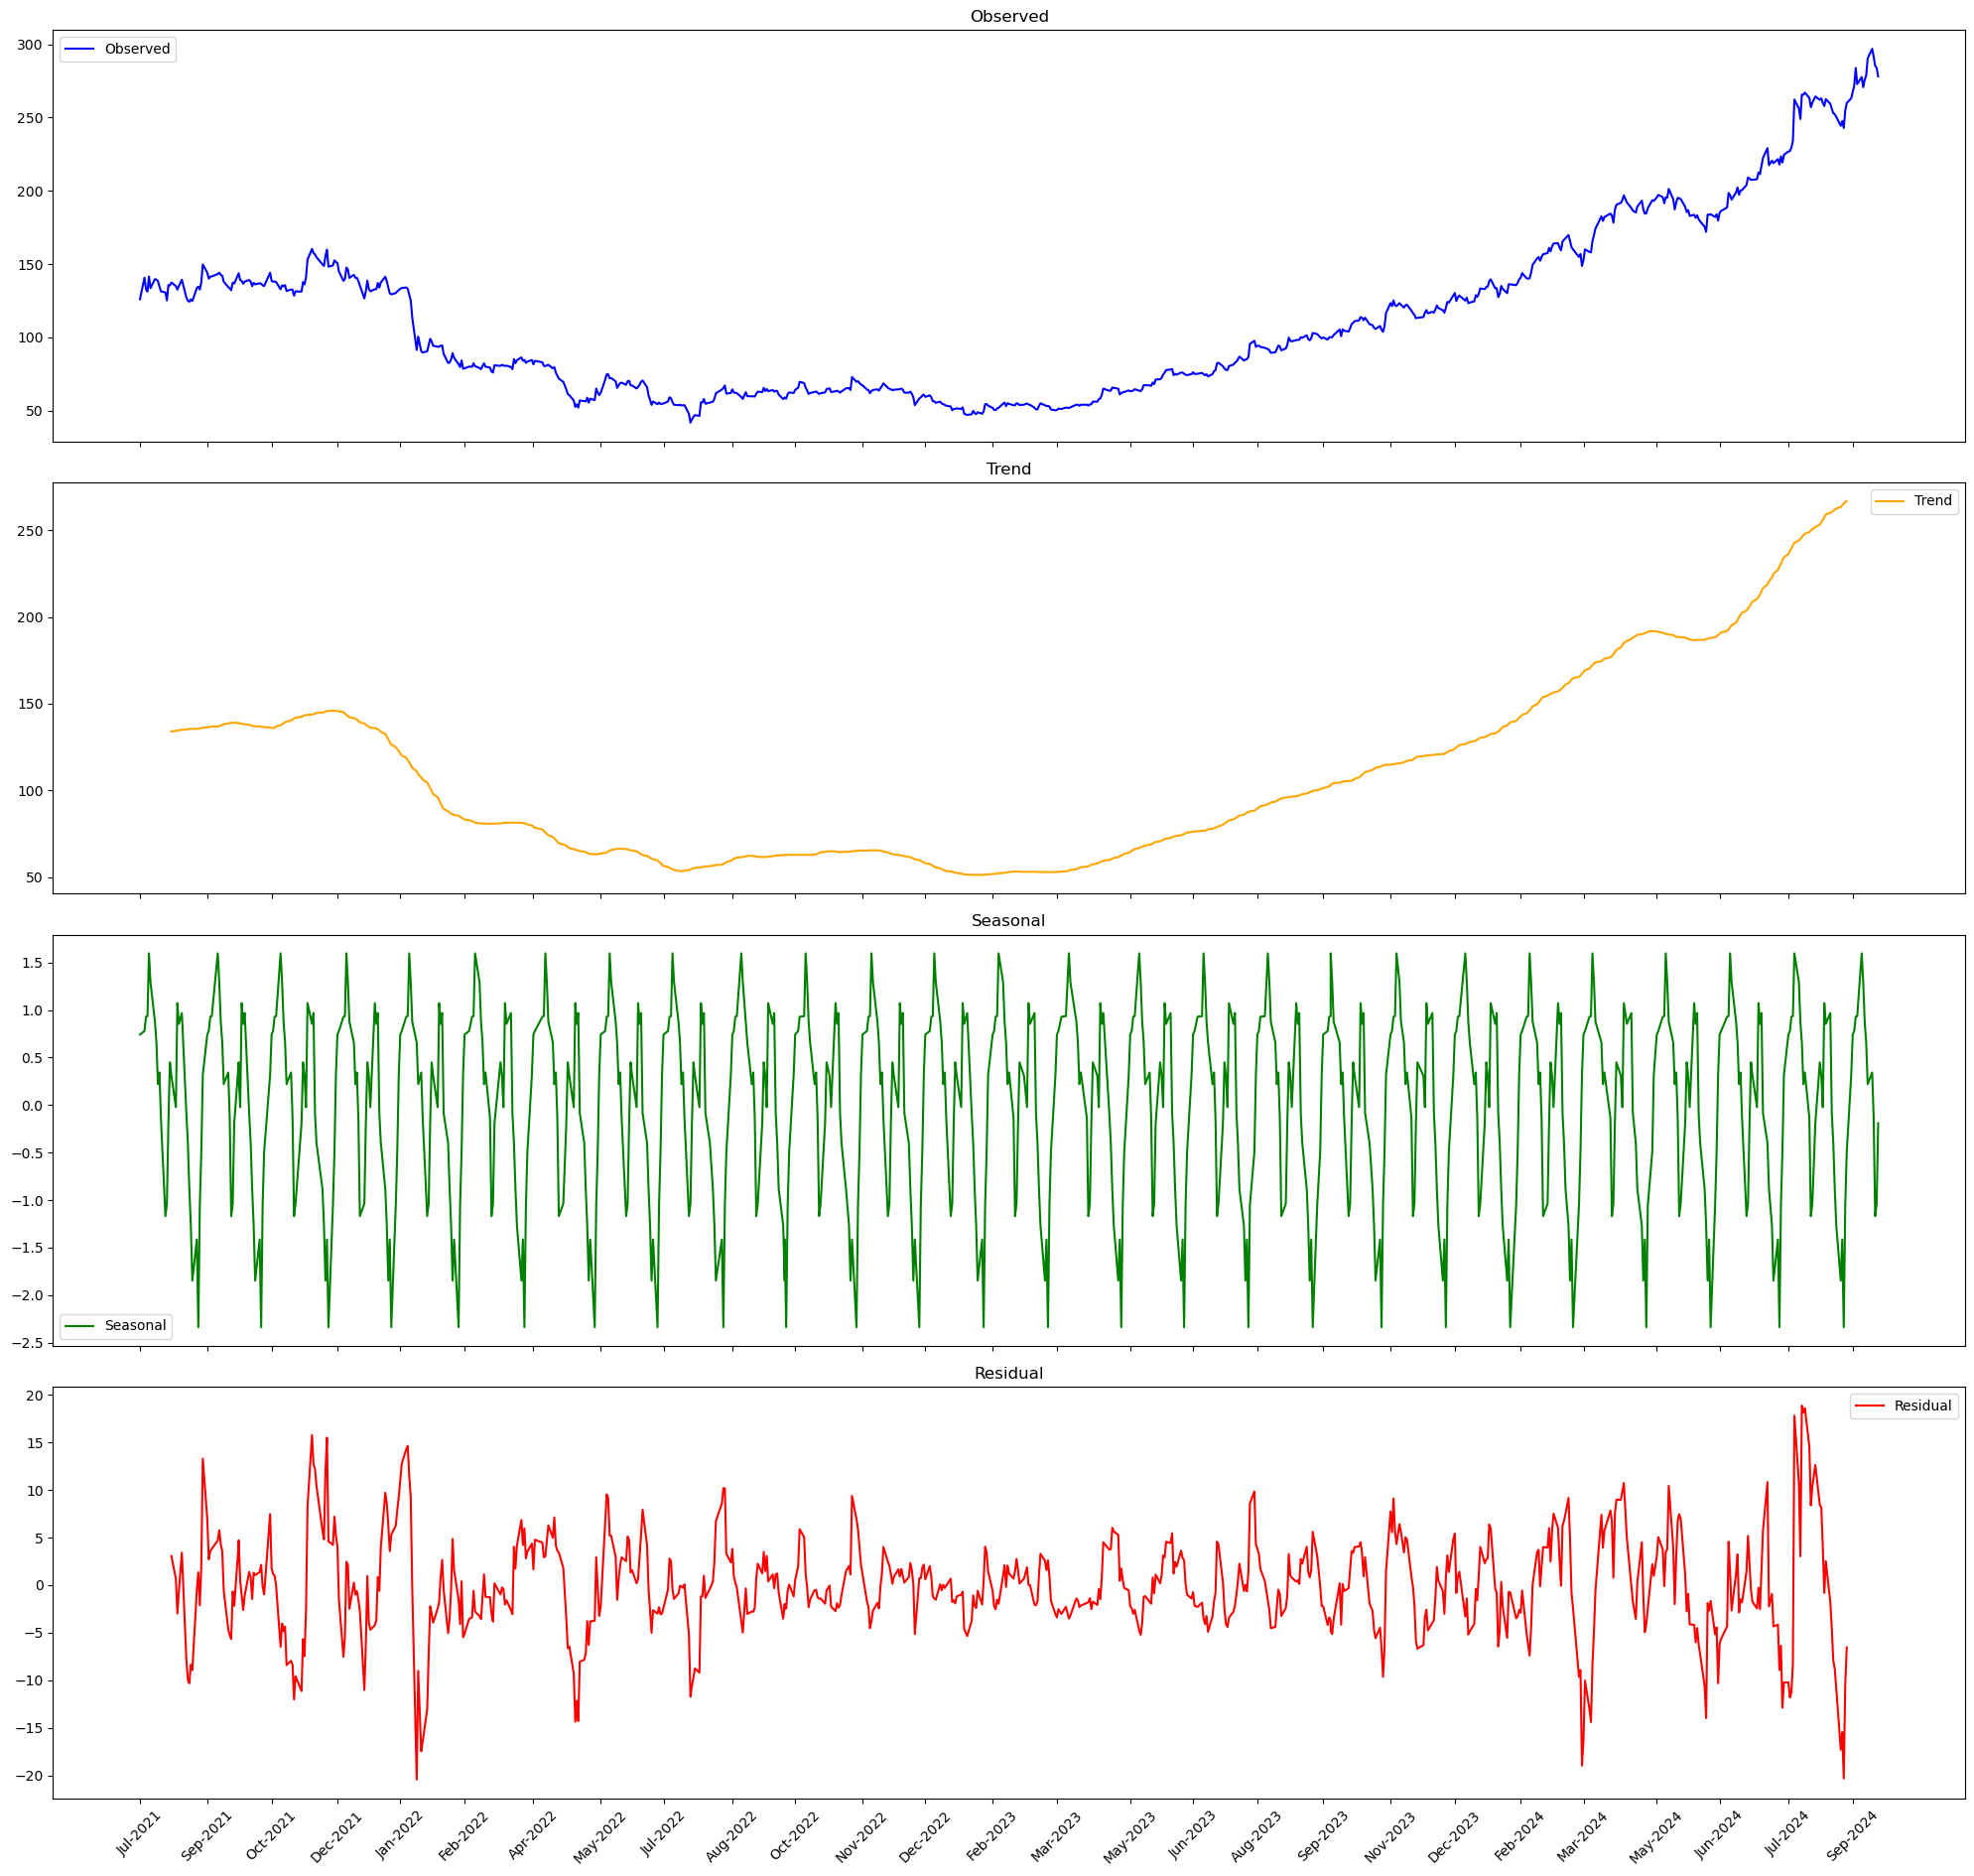

In [20]:
# Perform seasonal decomposition
result = seasonal_decompose(df1['Close'], model='additive', period=30)

# Create a figure and plot the results
fig, axs = plt.subplots(4, 1, figsize=(20, 19), sharex=True)

# Plot the observed data
axs[0].plot(result.observed.index, result.observed, label='Observed', color='blue')
axs[0].set_title('Observed')
axs[0].legend()

# Plot the trend
axs[1].plot(result.trend.index, result.trend, label='Trend', color='orange')
axs[1].set_title('Trend')
axs[1].legend()

# Plot the seasonal component
axs[2].plot(result.seasonal.index, result.seasonal, label='Seasonal', color='green')
axs[2].set_title('Seasonal')
axs[2].legend()

# Plot the residuals
axs[3].plot(result.resid.index, result.resid, label='Residual', color='red')
axs[3].set_title('Residual')
axs[3].legend()

# Format the x-ticks to show month-year
axs[3].set_xticks(result.observed.index[::30])  # Set ticks every 30 days
axs[3].set_xticklabels(result.observed.index.strftime('%b-%Y')[::30], rotation=45)

plt.tight_layout()
plt.show()


In [22]:
df2 = data[700:]

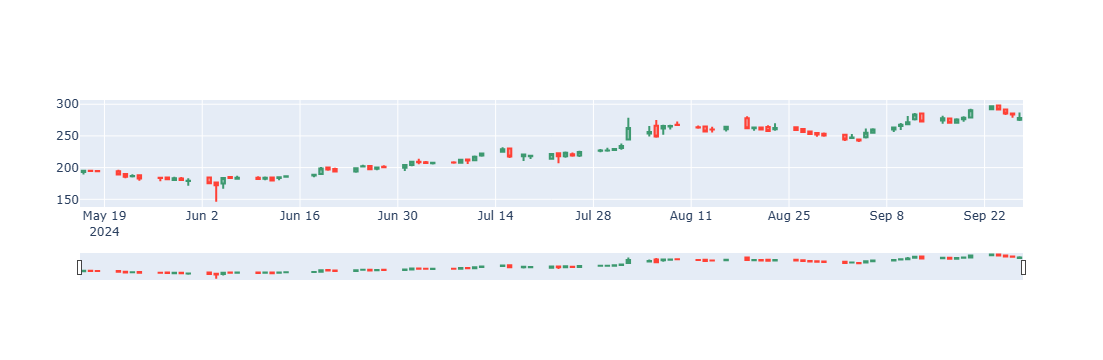

In [24]:
import plotly.graph_objects as go
#from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=df2.index,
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.show()

In [26]:
new_df = pd.DataFrame()
new_df = data['Close']
new_df.index = data.index

In [28]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_df.values

train_data=final_dataset[0:600,]
valid_data=final_dataset[600:,]

In [30]:
train_df = pd.DataFrame()
valid_df = pd.DataFrame()
train_df['Close'] = train_data
train_df.index = new_df[0:600].index
valid_df['Close'] = valid_data
valid_df.index = new_df[600:].index

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset.reshape(-1,1))

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [62]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_df[len(new_df)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=50,batch_size=10,verbose=2)

lstm_model.summary()

Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



54/54 - 2s - 40ms/step - loss: 0.0035
Epoch 2/50
54/54 - 1s - 15ms/step - loss: 7.5498e-04
Epoch 3/50
54/54 - 1s - 14ms/step - loss: 6.5051e-04
Epoch 4/50
54/54 - 1s - 12ms/step - loss: 6.6710e-04
Epoch 5/50
54/54 - 1s - 14ms/step - loss: 5.5099e-04
Epoch 6/50
54/54 - 1s - 15ms/step - loss: 4.9749e-04
Epoch 7/50
54/54 - 1s - 13ms/step - loss: 5.5250e-04
Epoch 8/50
54/54 - 1s - 13ms/step - loss: 4.7192e-04
Epoch 9/50
54/54 - 1s - 14ms/step - loss: 5.5271e-04
Epoch 10/50
54/54 - 1s - 14ms/step - loss: 4.4940e-04
Epoch 11/50
54/54 - 1s - 14ms/step - loss: 3.9468e-04
Epoch 12/50
54/54 - 1s - 14ms/step - loss: 3.9378e-04
Epoch 13/50
54/54 - 1s - 14ms/step - loss: 3.6583e-04
Epoch 14/50
54/54 - 1s - 14ms/step - loss: 4.1935e-04
Epoch 15/50
54/54 - 1s - 18ms/step - loss: 3.4138e-04
Epoch 16/50
54/54 - 1s - 18ms/step - loss: 3.4919e-04
Epoch 17/50
54/54 - 1s - 14ms/step - loss: 3.0753e-04
Epoch 18/50
54/54 - 1s - 13ms/step - loss: 3.3575e-04
Epoch 19/50
54/54 - 1s - 14ms/step - loss: 2.9259e-0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [64]:
X_test=[]  #initialize an empty list
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [66]:
valid_df['Predictions']=predicted_closing_price

<function matplotlib.pyplot.show(close=None, block=None)>

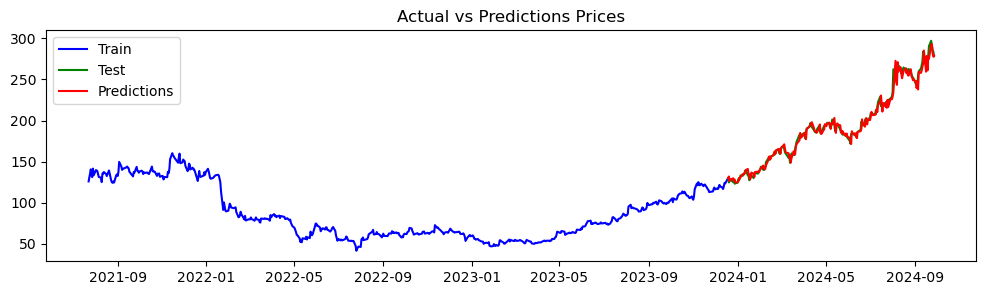

In [68]:
fig = plt.figure(figsize=(12,3))

plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')
plt.legend()

plt.plot(valid_df.index, valid_df['Close'], label='Test', color='green')
plt.legend()

plt.plot(valid_df.index, valid_df['Predictions'], label='Predictions', color='red')
plt.legend()

plt.title('Actual vs Predictions Prices')
plt.show

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(valid_df['Close'].values,valid_df['Predictions'].values)
print('Mean Squared Error ',mse)

Mean Squared Error  32.59069468561455


<function matplotlib.pyplot.show(close=None, block=None)>

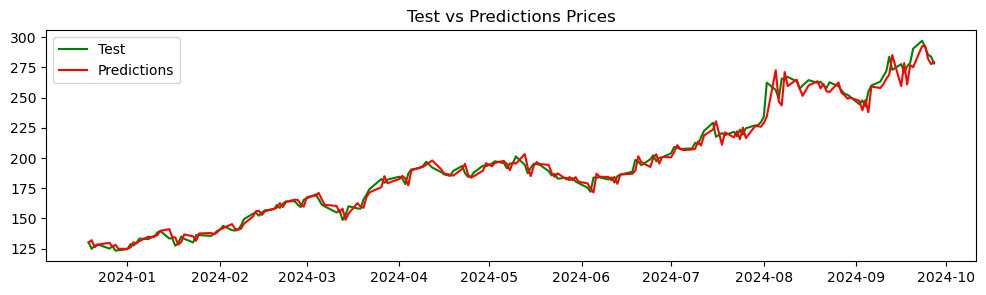

In [72]:
fig = plt.figure(figsize=(12,3))
plt.plot(valid_df.index, valid_df['Close'], label='Test', color='green')
plt.legend()

plt.plot(valid_df.index, valid_df['Predictions'], label='Predictions', color='red')
plt.legend()

plt.title('Test vs Predictions Prices')
plt.show

In [74]:
x=valid_df[-1:]

x

Close  Predictions
Date                           
2024-09-27  278.15   279.279083

In [76]:
time_step = 10
last_sequence = scaled_data[-time_step:].reshape(1, time_step, 1)

# Predict the next 30 days
future_steps = 30
future_predictions = []

for _ in range(future_steps):
    next_pred = lstm_model.predict(last_sequence)
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

    
# Inverse transform the predictions
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Step 7: Prepare for plotting
# Create a date range for future dates
data.index = pd.to_datetime(data.index)
last_date = data.index[-1:]
future_dates = pd.date_range(start=data.index[-1], periods=future_steps, freq='D')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━

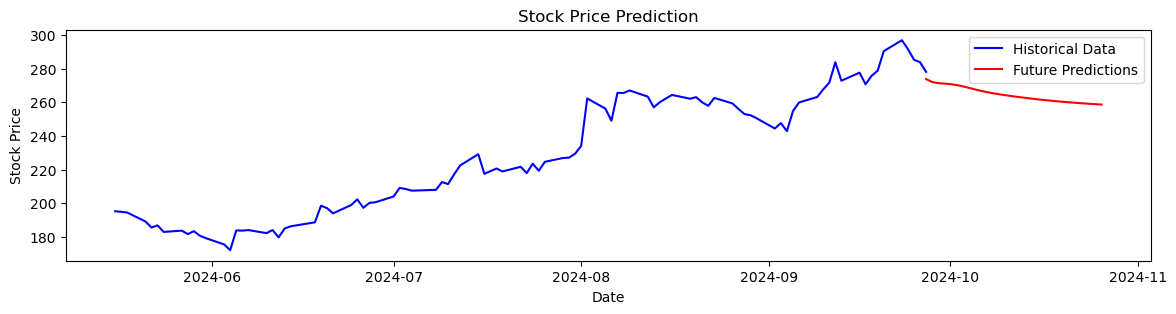

In [78]:
# Step 8: Plot the results
plt.figure(figsize=(14, 3))
plt.plot(data.index[700:], data.Close[700:], label='Historical Data', color='blue')
plt.plot(future_dates, future_predictions_inv, label='Future Predictions', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()